Saving 1. Predict Loan Default.csv to 1. Predict Loan Default.csv


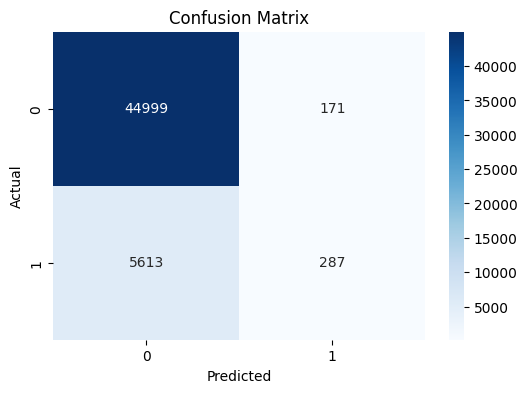

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.63      0.05      0.09      5900

    accuracy                           0.89     51070
   macro avg       0.76      0.52      0.51     51070
weighted avg       0.86      0.89      0.84     51070

✅ Accuracy: 0.89
✅ Precision: 0.63
✅ Recall: 0.05


In [7]:
# 📌 Step 1: Import necessary libraries


from google.colab import files
uploaded = files.upload()

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# ✅ Load the uploaded file (use the exact file name)
df = pd.read_csv('1. Predict Loan Default.csv')

# Drop 'LoanID' column (if exists)
if 'LoanID' in df.columns:
    df = df.drop(columns=['LoanID'])

# Drop missing values
df = df.dropna()

# Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Split features and target
X = df.drop('Default', axis=1)
y = df['Default']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Confusion Matrix Heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"✅ Accuracy: {accuracy:.2f}")
print(f"✅ Precision: {precision:.2f}")
print(f"✅ Recall: {recall:.2f}")
